In [60]:
import os, sys
from submit import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

from skimage.segmentation import  find_boundaries
from skimage.color import rgb2gray

@common.py:  
	set random seed
		SEED=35202
	set cuda environment
		torch.__version__              = 0.4.0a0+cdd0feb
		torch.version.cuda             = 8.0.61
		torch.backends.cudnn.version() = 7005
		os['CUDA_VISIBLE_DEVICES']     = 0,1,2,3
		torch.cuda.device_count()      = 4
		torch.cuda.current_device()    = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/htang6/remote/gru/workspace/mask-rcnn-resnet50-ver-01.a/common.py:26: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/zchen/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/zchen/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/zchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/zchen/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/zchen/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    io

filenames/histological_train.csv
(1, 256, 256)
a5fe0b7412dd152c41f7afc34ffdf276d4261b6942fa6d36803648e90f2cfc06


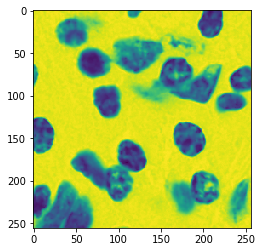

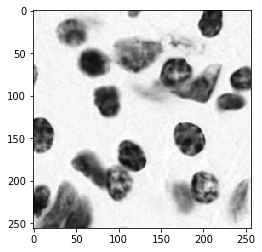

In [66]:
set_name = 'filenames/histological_train.csv'
data_dir = '/home/htang6/workspace/data/dsb2018/stage1_train/'
test_dataset = ScienceDataset(data_dir,  set_name, mode='train', transform=train_augment)
test_loader  = DataLoader(
                    test_dataset,
                    sampler = SequentialSampler(test_dataset),
                    batch_size  = 1,
                    drop_last   = False,
                    num_workers = 0,
                    pin_memory  = True,
                    collate_fn  = train_collate)

for inputs, truth_boxes, truth_labels, truth_instances, metas, indices in test_loader:
    image  = inputs[0].numpy()
    print(image.shape)
    name = test_dataset.filenames[indices[0]]
    print(name)
    
    plt.imshow(image[0])
    plt.show()
    plt.imshow(image[0], cmap='gray')
    plt.show()
#     plt.imshow(np.moveaxis(image, 0, -1))
#     plt.show()
#     plt.imshow(rgb2gray(np.moveaxis(image, 0, -1)), cmap='gray')
#     print(rgb2gray(np.moveaxis(image, 0, -1)).shape)
#     plt.show()
    break

1


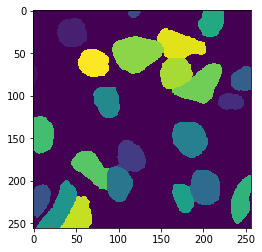

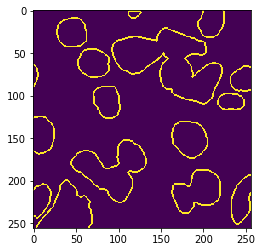

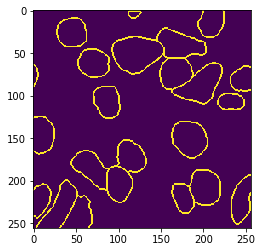

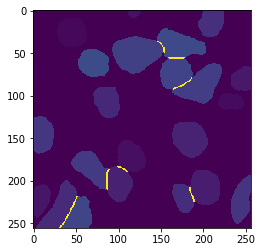

In [67]:
print(len(truth_instances))
multi_mask = instance_to_multi_mask(truth_instances[0])
boundaries = find_boundaries(multi_mask)
contour = find_boundaries(multi_mask == 0)
plt.imshow(multi_mask)
plt.show()
plt.imshow(contour)
plt.show()
plt.imshow(boundaries)
plt.show()

in_between = np.bitwise_xor(contour, boundaries)
plt.imshow(in_between)

multi_mask[in_between] = 100
plt.imshow(multi_mask)

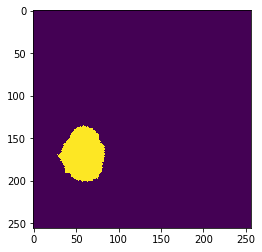

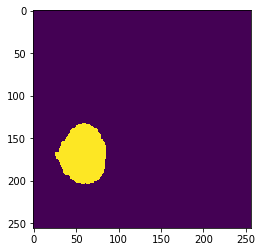

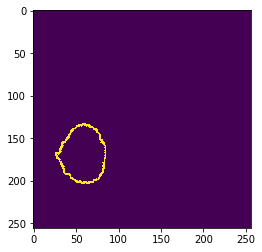

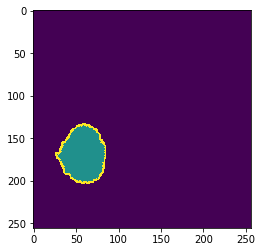

In [26]:
m = (multi_mask == 7).astype(np.uint8)
plt.imshow(m)
plt.show()

kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(m, kernel,iterations = 1)

plt.imshow(dilation)
plt.show()

contour = m - dilation
m[contour > 0] = 2
plt.imshow(contour)
plt.show()
plt.imshow(m)
plt.show()